[View in Colaboratory](https://colab.research.google.com/github/silentvoice/dl-with-keras/blob/master/naive-classification-imdb-reviews.ipynb)

# Imdb Reviews Classification

## Check Tensorflow Version

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.__version__

'1.9.0-rc2'

## Imports

In [65]:
from tensorflow import keras
from tensorflow.python.keras import preprocessing 
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import os

## Load Imdb dataset

In [5]:
# Use top 10000 frequently used words from the dataset only, discard the rest
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [6]:
train_data.shape

(25000,)

In [8]:
len(train_data[0])

218

In [0]:
train_labels.shape

(25000,)

In [9]:
train_labels[0]

1

In [10]:
wrdtoidx = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [11]:
idxtowrd = dict([(value, key) for (key, value) in wrdtoidx.items()])

In [12]:
sample_review = ' '.join([idxtowrd.get(idx) for idx in train_data[0]])

In [13]:
sample_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Data Preparation

In [17]:
def one_hot_encoder(samples, no_features):
  output_tensor = np.zeros((len(samples), no_features))
  for idx, sample in enumerate(samples):
    output_tensor[idx, sample] = 1
  return output_tensor

In [18]:
x_train = one_hot_encoder(train_data, 10000)
x_test = one_hot_encoder(test_data, 10000)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model

In [21]:
model = keras.models.Sequential()

In [22]:
model.add(keras.layers.Dense(16, activation= 'relu',input_shape = (10000,)))

In [23]:
model.add(keras.layers.Dense(16, activation= 'relu'))

In [24]:
model.add(keras.layers.Dense(1, activation= 'sigmoid'))

In [25]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Create a dummy validation set

In [26]:
x_val_set = x_train[:10000]
x_train_set = x_train[10000:]

In [27]:
y_val_set = y_train[:10000]
y_train_set = y_train[10000:]

## Train model using training data set

In [28]:
history = model.fit(x_train_set,
          y_train_set,
          epochs=20,
          batch_size=512,
          validation_data=(x_val_set, y_val_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.5354 - acc: 0.7711 - val_loss: 0.4174 - val_acc: 0.8489
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3253 - acc: 0.8999 - val_loss: 0.3166 - val_acc: 0.8851
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2346 - acc: 0.9273 - val_loss: 0.2859 - val_acc: 0.8898
Epoch 4/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1858 - acc: 0.9424 - val_loss: 0.2745 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1505 - acc: 0.9533 - val_loss: 0.2758 - val_acc: 0.8882
Epoch 6/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1271 - acc: 0.9612 - val_loss: 0.2896 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1044 - acc: 0.9714 - val_loss: 0.3049 - val_ac

In [29]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plot the training and validation loss and accuracy

In [31]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [32]:
epochs = range(1, len(train_acc) + 1)

Text(0,0.5,'Loss')

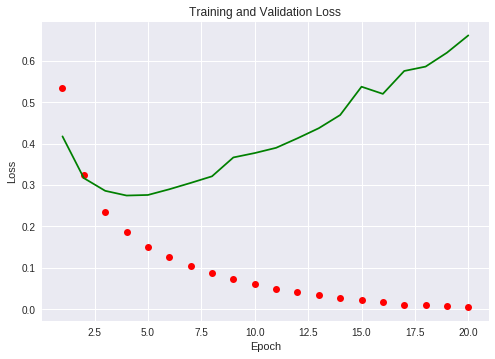

In [33]:
plt.plot(epochs, train_loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Accuracy')

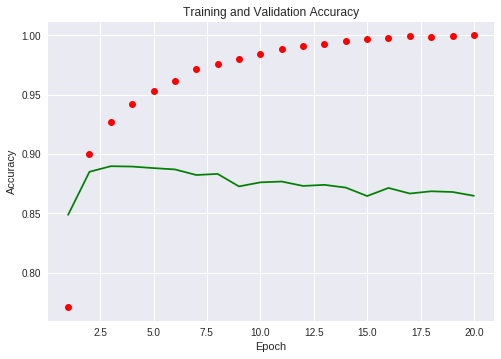

In [34]:
plt.clf()
plt.plot(epochs, train_acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## Retrain the entire model for 3 epochs

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 2s 60us/step - loss: 0.4900 - acc: 0.8247
Epoch 2/3
25000/25000 [==============================] - 1s 53us/step - loss: 0.2834 - acc: 0.9031
Epoch 3/3
25000/25000 [==============================] - 3s 115us/step


In [36]:
results

[0.277119307384491, 0.88968]

## Predict on test set

In [37]:
model.predict(x_test)

array([[0.2754202 ],
       [0.9996879 ],
       [0.90766305],
       ...,
       [0.14857861],
       [0.13795878],
       [0.5992787 ]], dtype=float32)

## Learning word embedding with embedding layer

In [44]:
max_features = 10000
max_len = 20

### Load Imdb Dataset

In [43]:
(x_train, x_label), (x_test, x_lable) = imdb.load_data(num_words=max_features)

### Preprocess Data

In [46]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

### Build Model

In [48]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [49]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_history = model.fit(x_train, y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 163us/step - loss: 0.7070 - acc: 0.5097 - val_loss: 0.6997 - val_acc: 0.5134
Epoch 2/10
20000/20000 [==============================] - 3s 163us/step - loss: 0.6852 - acc: 0.5498 - val_loss: 0.6860 - val_acc: 0.5562
Epoch 3/10
20000/20000 [==============================] - 3s 166us/step - loss: 0.6566 - acc: 0.6109 - val_loss: 0.6588 - val_acc: 0.5994
Epoch 4/10
20000/20000 [==============================] - 3s 165us/step - loss: 0.6100 - acc: 0.6699 - val_loss: 0.6163 - val_acc: 0.6512
Epoch 5/10
 7744/20000 [==========>...................] - ETA: 1s - loss: 0.5673 - acc: 0.712320000/20000 [==============================] - 3s 163us/step - loss: 0.5572 - acc: 0.7162 - val_loss: 0.5805 - val_acc: 0.6802
Epoch 6/10
20000/20000 [==============================] - 3s 163us/step - loss: 0.5153 - acc: 0.7429 - val_loss: 0.5615 - val_acc: 0.6938
Epoch 7/10
20000/20000 [================

### Using Glove Pretrained Word Vector

#### Download Raw Imdb Dataset

In [53]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz .

--2018-07-09 13:44:13--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  19.2MB/s    in 6.8s    

2018-07-09 13:44:20 (11.8 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

--2018-07-09 13:44:20--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2018-07-09 13:44:20--
Total wall clock time: 7.2s
Downloaded: 1 files, 80M in 6.8s (11.8 MB/s)


In [55]:
!mkdir -p data/imdb

In [56]:
!ls

aclImdb_v1.tar.gz  data  datalab


In [0]:
!tar zxvf aclImdb_v1.tar.gz -C /content/data/imdb/


In [59]:
imdb_dir = '/content/data/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [60]:
labels = []
texts = []

In [63]:
for label in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label)
  for f_name in os.listdir(dir_name):
    if f_name[-4:] == '.txt':
      f = open(os.path.join(dir_name, f_name))
      texts.append(f.read())
      f.close()
      if label == 'neg':
        labels.append(0)
      else:
        labels.append(1)

#### Data Processing -- Tokenization

In [66]:
max_len = 100

In [67]:
training_samples = 200

In [68]:
validation_samples = 10000

In [69]:
max_words = 10000

In [72]:
tokenizer = preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [73]:
word_idx = tokenizer.word_index

In [74]:
len(word_idx)

88582

In [75]:
data = preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [76]:
labels = np.asarray(labels)

In [77]:
data.shape, labels.shape

((25000, 100), (25000,))

In [79]:
indices = np.arange(data.shape[0])

In [80]:
np.random.shuffle(indices)

In [81]:
data = data[indices]

In [82]:
labels = labels[indices]

In [83]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

#### Download the glove embeddings

In [85]:
!wget http://nlp.stanford.edu/data/glove.6B.zip .

--2018-07-09 14:29:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-07-09 14:29:47--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip         49%[========>           ] 406.32M  17.1MB/s    eta 34s    glove.6B.zip        100%[===================>] 822.24M  20.2MB/s    in 53s     

2018-07-09 14:30:40 (15.5 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

--2018-07-09 14:30:40--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2018-07-09 14:30

In [91]:
!mkdir -p data/glove && unzip glove.6B.zip -d data/glove/

Archive:  glove.6B.zip
  inflating: data/glove/glove.6B.50d.txt  
  inflating: data/glove/glove.6B.100d.txt  
  inflating: data/glove/glove.6B.200d.txt  
  inflating: data/glove/glove.6B.300d.txt  


In [92]:
glove_dir = '/content/data/glove/'

In [93]:
embedding_idx = {}

In [94]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

In [95]:
for l in f:
  vals = l.split()
  word = vals[0]
  coefs = np.asarray(vals[1:], dtype='float32')
  embedding_idx[word] = coefs
f.close()  

In [96]:
len(embedding_idx)

400000

In [97]:
embedding_dim = 100
embedding_mat = np.zeros((max_words, embedding_dim))

In [99]:
for word, idx in word_idx.items():
  embedding_vector = embedding_idx.get(word)
  if idx < max_words:
    if embedding_vector is not None:
      embedding_mat[idx] = embedding_vector

#### Build Model

In [102]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### Load Glove Embedding in the model

In [105]:
model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

In [106]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [107]:
model_history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3128 - acc: 0.5350 - val_loss: 0.8434 - val_acc: 0.4941
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7260 - acc: 0.7350 - val_loss: 1.5885 - val_acc: 0.5063
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4584 - acc: 0.8450 - val_loss: 1.3966 - val_acc: 0.4935
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2851 - acc: 0.9250 - val_loss: 1.5846 - val_acc: 0.5066
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3801 - acc: 0.8300 - val_loss: 0.7834 - val_acc: 0.5365
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1692 - acc: 0.9650 - val_loss: 0.9715 - val_acc: 0.5064
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1019 - acc: 0.9900 - val_loss: 1.1879 - val_acc: 0.5001
Epoch 8/10
200/200 [========

In [109]:
model.save_weights('pre_trained_glove_model.h5')